<a href="https://colab.research.google.com/github/cannin/gsoc_2023_pytorch_pathway_commons/blob/main/Notebooks/gnn_modelling_with_breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Data

In [ ]:
!wget https://zenodo.org/record/8232723/files/X_train.csv?download=1 -O X_train.csv

--2023-08-17 13:09:46--  https://zenodo.org/record/8232723/files/X_train.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44836667 (43M) [text/plain]
Saving to: ‘X_train.csv’

X_train.csv         100%[===================>]  42.76M   534KB/s    in 83s     

2023-08-17 13:11:11 (527 KB/s) - ‘X_train.csv’ saved [44836667/44836667]



In [ ]:
!wget https://zenodo.org/record/8232723/files/X_test.csv?download=1 -O X_test.csv

--2023-08-17 13:11:11--  https://zenodo.org/record/8232723/files/X_test.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15058192 (14M) [text/plain]
Saving to: ‘X_test.csv’

X_test.csv          100%[===================>]  14.36M   305KB/s    in 30s     

2023-08-17 13:11:43 (487 KB/s) - ‘X_test.csv’ saved [15058192/15058192]



In [ ]:
!wget https://zenodo.org/record/8232723/files/y_test.csv?download=1 -O y_test.csv

--2023-08-17 13:11:43--  https://zenodo.org/record/8232723/files/y_test.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5425 (5.3K) [text/plain]
Saving to: ‘y_test.csv’

y_test.csv          100%[===================>]   5.30K  --.-KB/s    in 0s      

2023-08-17 13:11:45 (3.28 GB/s) - ‘y_test.csv’ saved [5425/5425]



In [ ]:
!wget https://zenodo.org/record/8232723/files/y_train.csv?download=1 -O y_train.csv

--2023-08-17 13:11:45--  https://zenodo.org/record/8232723/files/y_train.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16225 (16K) [text/plain]
Saving to: ‘y_train.csv’

y_train.csv         100%[===================>]  15.84K  --.-KB/s    in 0s      

2023-08-17 13:11:55 (136 MB/s) - ‘y_train.csv’ saved [16225/16225]



In [ ]:
!wget https://zenodo.org/record/8232723/files/X_val.csv?download=1 -O X_val.csv

--2023-08-17 13:11:55--  https://zenodo.org/record/8232723/files/X_val.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14951235 (14M) [text/plain]
Saving to: ‘X_val.csv’

X_val.csv           100%[===================>]  14.26M   528KB/s    in 28s     

2023-08-17 13:12:24 (527 KB/s) - ‘X_val.csv’ saved [14951235/14951235]



In [ ]:
!wget https://zenodo.org/record/8232723/files/y_val.csv?download=1 -O y_val.csv

--2023-08-17 13:12:24--  https://zenodo.org/record/8232723/files/y_val.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [text/plain]
Saving to: ‘y_val.csv’

y_val.csv           100%[===================>]   5.27K  --.-KB/s    in 0s      

2023-08-17 13:12:25 (2.51 GB/s) - ‘y_val.csv’ saved [5400/5400]



In [ ]:
!wget https://zenodo.org/record/8233085/files/edge_index.pt?download=1 -O edge_index.pt

--2023-08-17 13:12:25--  https://zenodo.org/record/8233085/files/edge_index.pt?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4349044 (4.1M) [application/octet-stream]
Saving to: ‘edge_index.pt’

edge_index.pt       100%[===================>]   4.15M   534KB/s    in 8.1s    

2023-08-17 13:12:34 (521 KB/s) - ‘edge_index.pt’ saved [4349044/4349044]



In [ ]:
!pip install torch-geometric

# Importing Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type != 'cuda':
    raise SystemError('GPU device not found')

Using device: cuda


In [ ]:
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = np.loadtxt("y_train.csv", delimiter=',')

X_test = pd.read_csv("X_test.csv", index_col=0)
y_test = np.loadtxt("y_test.csv", delimiter=',')

X_val = pd.read_csv("X_val.csv", index_col=0)
y_val = np.loadtxt("y_val.csv", delimiter=',')

In [ ]:
edge_index = torch.load('edge_index.pt')

In [ ]:
edge_index

tensor([[   0,    0,    0,  ..., 9287, 9287, 9287],
        [ 451,  452,  453,  ..., 3323, 3340, 3341]])

In [ ]:
edge_index.shape

torch.Size([2, 271771])

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((649, 9288), (217, 9288), (216, 9288))

In [ ]:
X_train = X_train.values
X_test = X_test.values
X_val = X_val.values

# Generating patient-specific graphs

In [ ]:
num_patients_train = X_train.shape[0]
num_patients_test = X_test.shape[0]
num_patients_val = X_val.shape[0]

# Create patient-specific graphs for the training set
graphs_train = []
for i in range(num_patients_train):
    node_features = X_train[i]  # Node features for the i-th patient
    target = y_train[i]  # Target label for the i-th patient
    graph_train = (node_features, edge_index, target)
    graphs_train.append(graph_train)

# Create patient-specific graphs for the test set
graphs_test = []
for i in range(num_patients_test):
    node_features = X_test[i]  # Node features for the i-th patient
    target = y_test[i]  # Target label for the i-th patient
    graph_test = (node_features, edge_index, target)
    graphs_test.append(graph_test)

# Create patient-specific graphs for the test set
graphs_val = []
for i in range(num_patients_val):
    node_features = X_val[i]  # Node features for the i-th patient
    target = y_val[i]  # Target label for the i-th patient
    graph_val = (node_features, edge_index, target)
    graphs_val.append(graph_test)

In [ ]:
# Check the number of patient-specific graphs
print(len(graphs_train))  # Should be 857
print(len(graphs_test))  # Should be 217
print(len(graphs_val))

649
217
216


In [ ]:
# Access the patient-specific graph for a specific patient in the training set
patient_index = 0 # Index of the patient
node_features, edge_index, y = graphs_train[patient_index]
print(node_features)  # Node features for the specific patient
print(edge_index)  # Edge index for the specific patient
print(y)

[   0.     5798.37      8.6165 ...  415.824   931.957  1180.46  ]
tensor([[   0,    0,    0,  ..., 9287, 9287, 9287],
        [ 451,  452,  453,  ..., 3323, 3340, 3341]])
133.0505967


In [ ]:
# Access the patient-specific graph for a specific patient in the training set
patient_index = 15  # Index of the patient
node_features, edge_index, y = graphs_test[patient_index]
print(node_features)  # Node features for the specific patient
print(edge_index)  # Edge index for the specific patient
# print(y)

[0.00000e+00 2.87393e+04 9.46600e-01 ... 5.60854e+02 7.04274e+02
 5.87369e+02]
tensor([[   0,    0,    0,  ..., 9287, 9287, 9287],
        [ 451,  452,  453,  ..., 3323, 3340, 3341]])


In [ ]:
# Access the patient-specific graph for a specific patient in the training set
patient_index = 15  # Index of the patient
node_features, edge_index, y = graphs_val[patient_index]
print(node_features)  # Node features for the specific patient
print(edge_index)  # Edge index for the specific patient
# print(y)

[   0.    7339.17     0.    ...  521.169 2435.84   462.114]
tensor([[   0,    0,    0,  ..., 9287, 9287, 9287],
        [ 451,  452,  453,  ..., 3323, 3340, 3341]])


# Converting List of Graphs to Data Objects

In [ ]:
# Convert graphs_train to a list of Data objects
data_train = [Data(x=torch.tensor(graph[0].reshape(len(graphs_train[0][0]), 1)), edge_index=graph[1], y=torch.tensor(graph[2])) for graph in graphs_train]

# Convert graphs_test to a list of Data objects
data_test = [Data(x=torch.tensor(graph[0].reshape(len(graphs_test[0][0]), 1)), edge_index=graph[1], y=torch.tensor(graph[2])) for graph in graphs_test]

# Convert graphs_test to a list of Data objects
data_val = [Data(x=torch.tensor(graph[0].reshape(len(graphs_val[0][0]), 1)), edge_index=graph[1], y=torch.tensor(graph[2])) for graph in graphs_val]

In [ ]:
# Access the attributes of a specific data object in the training set
sample = data_train[0]  # Get the first data object
print(sample)  # Print the data object

# Access the node features, edge indices, and target label
node_features = sample.x
edge_index = sample.edge_index
target = sample.y

print(node_features)  # Print the node features
print(edge_index)  # Print the edge indices
print(target)  # Print the target label

Data(x=[9288, 1], edge_index=[2, 271771], y=133.0505967)
tensor([[   0.0000],
        [5798.3700],
        [   8.6165],
        ...,
        [ 415.8240],
        [ 931.9570],
        [1180.4600]], dtype=torch.float64)
tensor([[   0,    0,    0,  ..., 9287, 9287, 9287],
        [ 451,  452,  453,  ..., 3323, 3340, 3341]])
tensor(133.0506, dtype=torch.float64)


# Creating Train, Test and Validation Batches

In [ ]:
from torch_geometric.loader import DataLoader

In [ ]:
bs = 8
train_loader = DataLoader(data_train, batch_size=bs, shuffle=True)
test_loader = DataLoader(data_test, batch_size=bs, shuffle=False)
val_loader = DataLoader(data_val, batch_size=bs, shuffle=True)

for step, data in enumerate(train_loader):
    data = data.to(device)  # Move the batch of data to the device

    print('Training Batches: ')
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Training Batches: 
Step 1:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Training Batches: 
Step 2:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Training Batches: 
Step 3:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Training Batches: 
Step 4:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Training Batches: 
Step 5:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Training Batches: 
Step 6:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Training Batches: 
Step 7:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2,

In [ ]:
for step, data in enumerate(test_loader):
    data = data.to(device)
    print('Test Batches: ')
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Test Batches: 
Step 1:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Test Batches: 
Step 2:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Test Batches: 
Step 3:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Test Batches: 
Step 4:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Test Batches: 
Step 5:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Test Batches: 
Step 6:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Test Batches: 
Step 7:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[743

In [ ]:
for step, data in enumerate(val_loader):
    data = data.to(device)
    print('Val Batches: ')
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Val Batches: 
Step 1:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Val Batches: 
Step 2:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Val Batches: 
Step 3:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Val Batches: 
Step 4:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Val Batches: 
Step 5:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Val Batches: 
Step 6:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], ptr=[9])

Val Batches: 
Step 7:
Number of graphs in the current batch: 8
DataBatch(x=[74304, 1], edge_index=[2, 2174168], y=[8], batch=[74304], pt

# Model Building and Evaluation

In [ ]:
import torch_geometric
from torch.nn import Linear, Module, Dropout, MSELoss, CrossEntropyLoss, BatchNorm1d
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, GraphNorm
from torch_geometric.nn import global_mean_pool

from torch.nn.functional import relu, sigmoid
# from torch_sparse import SparseTensor

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels, num_node_features):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.conv4 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 1)  # Regression output with 1 dimension

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        # x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index)
        x = x.relu()
        # F.dropout(x, p=0.2, training=self.training)
        x = self.conv3(x, edge_index)
        x = self.conv4(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final regression layer
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.lin(x)

        return x.squeeze()  # Remove the extra dimension

In [ ]:
import time

In [ ]:
start_time = time.time()

model = GCN(hidden_channels=64, num_node_features=1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

model = model.to(device)  # Move the model to CUDA device
criterion = criterion.to(device)  # Move the criterion to CUDA device

model.double()  # Convert the model's parameters to Double type

num_epochs = 101  # Specify the number of epochs


# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to train mode
    total_loss = 0

    for step, data in enumerate(train_loader):
        data = data.to(device)  # Move the batch of data to CUDA device

        optimizer.zero_grad()

        out = model(data.x.double(), data.edge_index, data.batch)
        loss = criterion(out, data.y.view(-1).double())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # average_loss = total_loss / (step + 1)
    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for data in val_loader:
            data = data.to(device)
            out = model(data.x.double(), data.edge_index, data.batch)
            loss = criterion(out, data.y.view(-1).double())
            val_loss += loss.item()

        average_val_loss = val_loss / len(val_loader)
        val_losses.append(average_val_loss)

        print(f'Epoch: {epoch:03d}, Train loss: {average_loss:.4f}, Validation Loss: {average_val_loss:.4f}')

# Calculate the elapsed time
elapsed_time = time.time() - start_time

print(f"Time used for training: {elapsed_time:.2f} seconds")

Epoch: 000, Train loss: 10132.6370, Validation Loss: 4025.5869
Epoch: 001, Train loss: 5770.7315, Validation Loss: 3646.5534
Epoch: 002, Train loss: 5181.3856, Validation Loss: 2451.2463
Epoch: 003, Train loss: 4012.0951, Validation Loss: 3061.8195
Epoch: 004, Train loss: 3636.3772, Validation Loss: 3405.7166
Epoch: 005, Train loss: 3204.7383, Validation Loss: 3695.5665
Epoch: 006, Train loss: 3019.1480, Validation Loss: 3965.9711
Epoch: 007, Train loss: 2938.4869, Validation Loss: 3509.5998
Epoch: 008, Train loss: 2564.9824, Validation Loss: 2749.6864
Epoch: 009, Train loss: 2639.6444, Validation Loss: 4262.8099
Epoch: 010, Train loss: 2378.8293, Validation Loss: 3074.2873
Epoch: 011, Train loss: 2526.8721, Validation Loss: 3675.9624
Epoch: 012, Train loss: 2384.6189, Validation Loss: 4438.9961
Epoch: 013, Train loss: 2464.6361, Validation Loss: 3444.3356
Epoch: 014, Train loss: 2434.5143, Validation Loss: 3103.3803
Epoch: 015, Train loss: 2317.5653, Validation Loss: 4100.2050
Epoch: 

In [ ]:
model.eval()  # Set the model to evaluation mode

predictions = []  # List to store the predicted outputs
test_losses = []
with torch.no_grad():
    test_loss = 0
    for data in test_loader:
        data = data.to(device)  # Move the batch of data to CUDA device
        out = model(data.x.double(), data.edge_index, data.batch)
        loss = criterion(out, data.y.view(-1).double())
        test_loss += loss.item()

        average_test_loss = test_loss / len(test_loader)
        test_losses.append(average_val_loss)

        predictions.append(out.cpu().detach().numpy())  # Convert the predictions to NumPy array

# Concatenate the predictions from multiple batches
predictions = np.concatenate(predictions)

# Print the predictions
print(predictions[:10])

[43.55725092 44.08028075 38.91240359 49.6856782  57.11545471 49.2488646
 46.26797878 69.44459431 40.08783161 47.09477596]


## Making Predictions and calculating MSE

In [ ]:
# Convert the test data batches to a list of Data objects
test_data_batches = [
    Data(x=batch.x, edge_index=batch.edge_index, y=batch.y) for batch in test_loader
]

# Convert the predictions to PyTorch tensors
predictions = torch.tensor(predictions)

# Convert the ground truth labels of the test data to a PyTorch tensor
y_true = torch.cat([batch.y for batch in test_data_batches])

# Calculate the mean squared error (MSE) loss using PyTorch's function
mse_loss = torch.nn.functional.mse_loss(predictions.view(-1), y_true.view(-1))

print(f"Mean Squared Error (MSE) Loss: {mse_loss:.4f}")

Mean Squared Error (MSE) Loss: 957.8370


## Plotting the convergence of the model

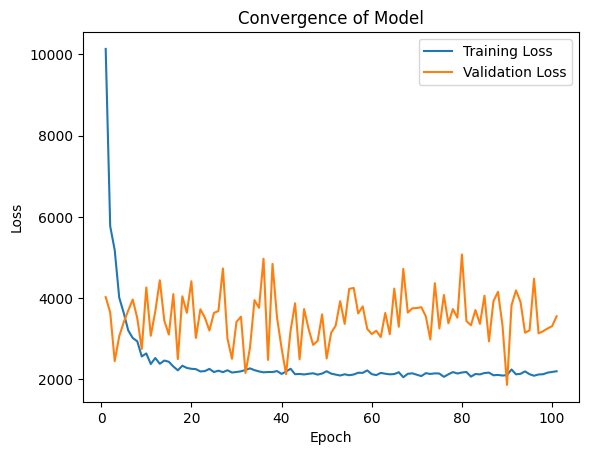

In [ ]:
# Visualize convergence results
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Convergence of Model')
plt.show()